In [55]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import pandas as pd

read_file = pd.read_excel (r'Binary_relations_1.xlsx')
matrix = read_file.to_csv (r'Binary_relations.csv', index = None, header=True)

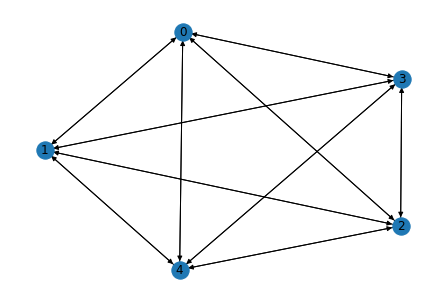

In [56]:
input_data = pd.read_csv('Binary_relations.csv', index_col = 0) 
G = nx.DiGraph(input_data.values)

nx.draw(G, with_labels = True)

In [57]:
arr = input_data.to_numpy()
arr

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int64)

In [58]:
tran = np.transpose(arr)
tran

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int64)

In [59]:
def CompleteCheck(arr):
    counter = 0
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if(arr[i][j] == 1):
                counter +=1 
            else:
                counter = 0
    if counter == len(arr)*len(arr[i]):
        return True
        #print("Binary relation is complete.")
    else:
        return False
        #print("Binary relation is not complete.")
        
CompleteCheck(arr)

True

In [60]:
def ReflexiveCheck(arr):
    
    if sum(arr.diagonal()) == len(arr):
        return True
        #print("Binary relation is reflexive.")
    else:
        return False
        #print("Binary relation is not reflexive.")
        
ReflexiveCheck(arr)

True

In [61]:
def AsymmetricCheck(arr):
    
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if (arr[i][j] == arr[j][i]):
                return True
    return False

if (AsymmetricCheck(arr) == True):
    print ("Binary relation is asymmetric.")
else:
    print ("Binary relation is not asymmetric.")

Binary relation is asymmetric.


In [62]:
def SymmetricCheck(arr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if (arr[i][j] != arr[j][i]):
                return False
    return True

if (SymmetricCheck(arr) == True):
    print ("Binary relation is symmetric.")
else:
    print ("Binary relation is not symmetric.")

Binary relation is symmetric.


In [63]:
def AntisymmetricCheck(arr):
    tr = -np.transpose(arr)

    if (np.array_equal(arr, tr)):
        return True
        #print ("Binary relation is antisymmetric.")
    else:
        return False
        #print ("Binary relation is not antisymmetric.")
        
AntisymmetricCheck(arr)

False

In [64]:
def TransitiveCheck(arr):
    for a in range(len(arr)):
        for b in range (len(arr[a])):
             for c in range (len(arr[b])):
                if (arr[a][b] != 0):
                    if ((a!=b and b!=c) and (arr[a][b] == 1 and arr[b][c] == 1 and arr[c][a] == 1)):
                        return True
    return False

TransitiveCheck(arr)

True

In [65]:
# We also call a built-in function to check if we are getting the correct result from our function.
def TransitiveCheck1(arr):
    if (nx.transitivity(G) != 1):
        return False
    return True

TransitiveCheck1(arr)

True

In [66]:
def NegativetransitiveCheck(arr):
    for a in range(len(arr)):
        for b in range (len(arr[a])):
             for c in range (len(arr[a])):
                if ((a!=b and b!=c) and (arr[a][b] == 0 and arr[b][c] == 0 and arr[c][a] == 0)):
                    return True
    return False

NegativetransitiveCheck(arr)

False

In [67]:
def CompleteOrderCheck(arr):
    if (CompleteCheck(arr) and AntisymmetricCheck(arr) and TransitiveCheck(arr)):
        return True
    return False

CompleteOrderCheck(arr)

False

In [68]:
def CompletePreOrderCheck(arr):
    if (ReflexiveCheck(arr) and TransitiveCheck(arr)):
        return True
    return False

CompletePreOrderCheck(arr)

True

In [69]:
def StrictRelation(arr):
    t = -np.transpose(arr)
    s = 0.5*(arr+t)
    print(s)

StrictRelation(arr)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [70]:
def IndifferenceRelation(arr):
    t = -np.transpose(arr)
    a = 0.5*(arr-t)
    print(a)

IndifferenceRelation(arr)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [71]:
from collections import defaultdict

class Graph:
    def __init__(self,vertices):
        self.graph = G
        self.V = vertices
 
    def TopologicalsortingUtil(self,v,visited,stack):
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                self.TopologicalsortingUtil(i,visited,stack)
        stack.insert(0,v)
        
    def Topologicalsorting(self):
        visited = [False]*self.V
        stack =[]
        for i in range(self.V):
            if visited[i] == False:
                self.TopologicalsortingUtil(i,visited,stack)
        print(stack)

g = Graph(G.number_of_nodes())

print ("Topological Sorting:")
g.Topologicalsorting()

Topological Sorting:
[0, 1, 2, 3, 4]
